In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

C:\Users\Amrit\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
## csv of s&p 500 data from yahoo finance
filepath = "../Input/^GSPC.csv"

# Load spreadsheet
xl = pd.ExcelFile("../Input/government_shutdown_stats.xlsx")

# Load a sheet into a DataFrame by name:
shutdown_df = xl.parse(xl.sheet_names[0])


In [3]:
## read stock csv
stock_prices_unclean = pd.read_csv(filepath)


In [4]:
# ## make the index the date to help with cleaning
stock_prices_unclean = stock_prices_unclean.set_index(['Date'])

In [5]:
stock_prices_unclean.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1976-07-12,104.980003,106.300003,104.739998,105.900002,105.900002,23750000
1976-07-13,105.900002,106.779999,105.150002,105.669998,105.669998,27550000
1976-07-14,105.669998,106.610001,105.050003,105.949997,105.949997,23840000
1976-07-15,105.949997,106.250000,104.760002,105.199997,105.199997,20400000
1976-07-16,105.199997,105.269997,103.870003,104.680000,104.680000,20450000


In [6]:
shutdown_df

,shutdown_number,from_date,to_date,length_in_days,pres_party_in_power,president,senate_party_in_power,senate_seats,house_party_in_power,house_seats
0,1,1976-09-30,1976-10-11,12,R,Ford,D,62 - 38,D,291 - 144
1,2,1977-09-30,1977-10-13,14,D,Carter,D,59 - 41,D,292 - 143
2,3,1977-10-31,1977-11-09,10,D,Carter,D,59 - 41,D,292 - 143
3,4,1977-11-30,1977-12-09,10,D,Carter,D,59 - 41,D,292 - 143
4,5,1978-09-30,1978-10-18,19,D,Carter,D,59 - 41,D,292 - 143
5,6,1979-09-30,1979-10-12,13,D,Carter,D,58 - 42,D,277 - 158
6,7,1981-11-20,1981-11-23,4,R,Reagan,R,53 - 47,D,244 - 191
7,8,1982-09-30,1982-10-02,3,R,Reagan,R,53 - 47,D,244 - 191
8,9,1982-12-17,1982-12-21,5,R,Reagan,R,53 - 47,D,244 - 191
9,10,1983-11-10,1983-11-14,5,R,Reagan,R,55 - 45,D,271 - 164


In [7]:
## loops through all of csv, only keeping date ranges we need
stock_prices_clean = pd.DataFrame()
obs_count_list = []
for shutdown in range(len(shutdown_df)):
    try: 
        from_date = stock_prices_unclean.index.get_loc(shutdown_df["from_date"][shutdown])
    except KeyError: 
        from_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["from_date"][shutdown]) + datetime.timedelta(days=2)).date()))

    try: 
        to_date = stock_prices_unclean.index.get_loc(shutdown_df["to_date"][shutdown])
    except KeyError: 
        to_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["to_date"][shutdown]) + datetime.timedelta(days=2)).date()))
        
    obs_count_list.append(len(stock_prices_unclean.iloc[from_date-3:to_date+3]))
    stock_prices_clean = stock_prices_clean.append(stock_prices_unclean.iloc[from_date-3:to_date+3])


In [8]:
obs_count_list

[13, 15, 13, 13, 18, 14, 7, 8, 8, 8, 7, 8, 8, 8, 8, 12, 28, 18, 6, 6]

In [9]:
## add shutdown number to the table
stock_prices_clean["Shutdown Number"] = 0
shutdown = 1
beg = 0
for x in obs_count_list:
    stock_prices_clean["Shutdown Number"].iloc[beg:(beg+x)] = shutdown
    shutdown += 1
    beg = (beg + x)

C:\Users\Amrit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
stock_prices_clean

,Open,High,Low,Close,Adj Close,Volume,Shutdown Number
Date,,,,,,,
1976-09-27,106.800003,107.699997,106.349998,107.269997,107.269997,17430000,1
1976-09-28,107.269997,107.540001,105.610001,105.919998,105.919998,20440000,1
1976-09-29,105.919998,106.449997,104.830002,105.370003,105.370003,18090000,1
1976-09-30,105.370003,105.839996,104.570000,105.239998,105.239998,14700000,1
1976-10-01,105.239998,105.750000,103.599998,104.169998,104.169998,20620000,1
1976-10-04,104.169998,104.620003,103.419998,104.029999,104.029999,12630000,1
1976-10-05,104.029999,104.250000,102.510002,103.230003,103.230003,19200000,1
1976-10-06,103.230003,103.720001,102.050003,102.970001,102.970001,20870000,1
1976-10-07,102.970001,103.900002,102.160004,103.540001,103.540001,19830000,1


In [11]:
grouped_shutdown_prices = stock_prices_clean.groupby("Shutdown Number")

In [12]:
(grouped_shutdown_prices.max()-grouped_shutdown_prices.min())/grouped_shutdown_prices.mean()

,Open,High,Low,Close,Adj Close,Volume
Shutdown Number,,,,,,
1,0.062048,0.052635,0.057951,0.062260,0.062260,0.501042
2,0.034396,0.033792,0.031587,0.034439,0.034439,0.698910
3,0.047659,0.057086,0.055574,0.056987,0.056987,0.819171
4,0.041396,0.039166,0.039605,0.041489,0.041489,0.302203
5,0.059595,0.067305,0.071654,0.072499,0.072499,0.921383
6,0.073221,0.071598,0.073624,0.075082,0.075082,1.371429
7,0.026955,0.029542,0.030283,0.031102,0.031102,0.306645
8,0.026346,0.035320,0.025276,0.045290,0.045290,0.749851
9,0.034717,0.048427,0.029662,0.032616,0.032616,0.469992


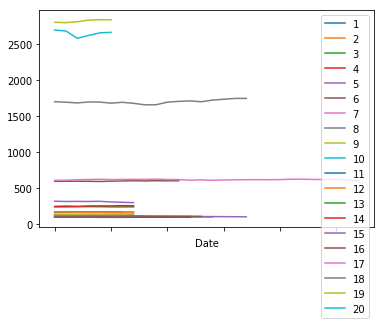

In [13]:
grouped_plot = stock_prices_clean.groupby('Shutdown Number')['Close'].plot(legend=True)

In [14]:
## coefficient of variation
co_var = grouped_shutdown_prices.std()/grouped_shutdown_prices.mean()
presidents = shutdown_df["president"]


([<matplotlib.axis.XTick at 0x8e2dc18>,
 <a list of 20 Text xticklabel objects>)

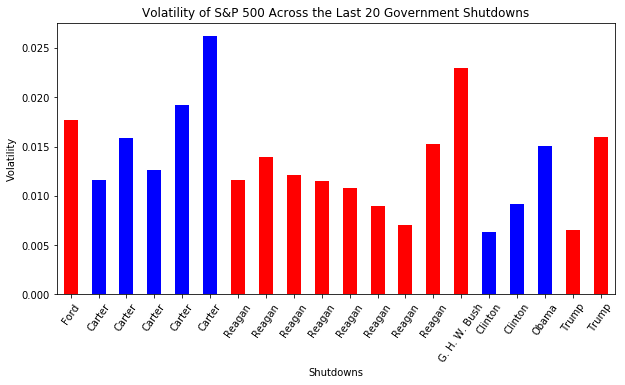

In [15]:
colors = []
for x in shutdown_df["pres_party_in_power"]:
    if x == "R":
        colors.append("r")
    elif x == "D":
        colors.append("b")
co_var["Close"].plot(kind="bar",figsize=(10, 5), color= colors)
plt.ylabel("Volatility")
plt.xlabel("Shutdowns")
plt.title("Volatility of S&P 500 Across the Last 20 Government Shutdowns")
plt.xticks(np.arange(20), presidents, rotation=55)

In [16]:
shutdown_df.head()

,shutdown_number,from_date,to_date,length_in_days,pres_party_in_power,president,senate_party_in_power,senate_seats,house_party_in_power,house_seats
0,1,1976-09-30,1976-10-11,12,R,Ford,D,62 - 38,D,291 - 144
1,2,1977-09-30,1977-10-13,14,D,Carter,D,59 - 41,D,292 - 143
2,3,1977-10-31,1977-11-09,10,D,Carter,D,59 - 41,D,292 - 143
3,4,1977-11-30,1977-12-09,10,D,Carter,D,59 - 41,D,292 - 143
4,5,1978-09-30,1978-10-18,19,D,Carter,D,59 - 41,D,292 - 143


In [17]:
## loops through all of csv, only keeping date ranges we need
stock_prices_clean_month_before = pd.DataFrame()
obs_count_list_month = []
for shutdown in range(len(shutdown_df)):
    try: 
        from_date = stock_prices_unclean.index.get_loc(shutdown_df["from_date"][shutdown])
    except KeyError: 
        from_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["from_date"][shutdown]) + datetime.timedelta(days=2)).date()))

    try: 
        to_date = stock_prices_unclean.index.get_loc(shutdown_df["to_date"][shutdown])
    except KeyError: 
        to_date = stock_prices_unclean.index.get_loc(str((pd.to_datetime(shutdown_df["to_date"][shutdown]) + datetime.timedelta(days=2)).date()))
        
    obs_count_list_month.append(len(stock_prices_unclean.iloc[from_date-30:to_date-24]))
    stock_prices_clean_month_before = stock_prices_clean.append(stock_prices_unclean.iloc[from_date-30:to_date-24])

C:\Users\Amrit\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [18]:
stock_prices_clean_month_before

,Adj Close,Close,High,Low,Open,Shutdown Number,Volume
Date,,,,,,,
1976-09-27,107.269997,107.269997,107.699997,106.349998,106.800003,1.0,17430000
1976-09-28,105.919998,105.919998,107.540001,105.610001,107.269997,1.0,20440000
1976-09-29,105.370003,105.370003,106.449997,104.830002,105.919998,1.0,18090000
1976-09-30,105.239998,105.239998,105.839996,104.570000,105.370003,1.0,14700000
1976-10-01,104.169998,104.169998,105.750000,103.599998,105.239998,1.0,20620000
1976-10-04,104.029999,104.029999,104.620003,103.419998,104.169998,1.0,12630000
1976-10-05,103.230003,103.230003,104.250000,102.510002,104.029999,1.0,19200000
1976-10-06,102.970001,102.970001,103.720001,102.050003,103.230003,1.0,20870000
1976-10-07,103.540001,103.540001,103.900002,102.160004,102.970001,1.0,19830000
